/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


INFO: Auto-setting vmin to -1.952e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.414e+01 [aplpy.core]


/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


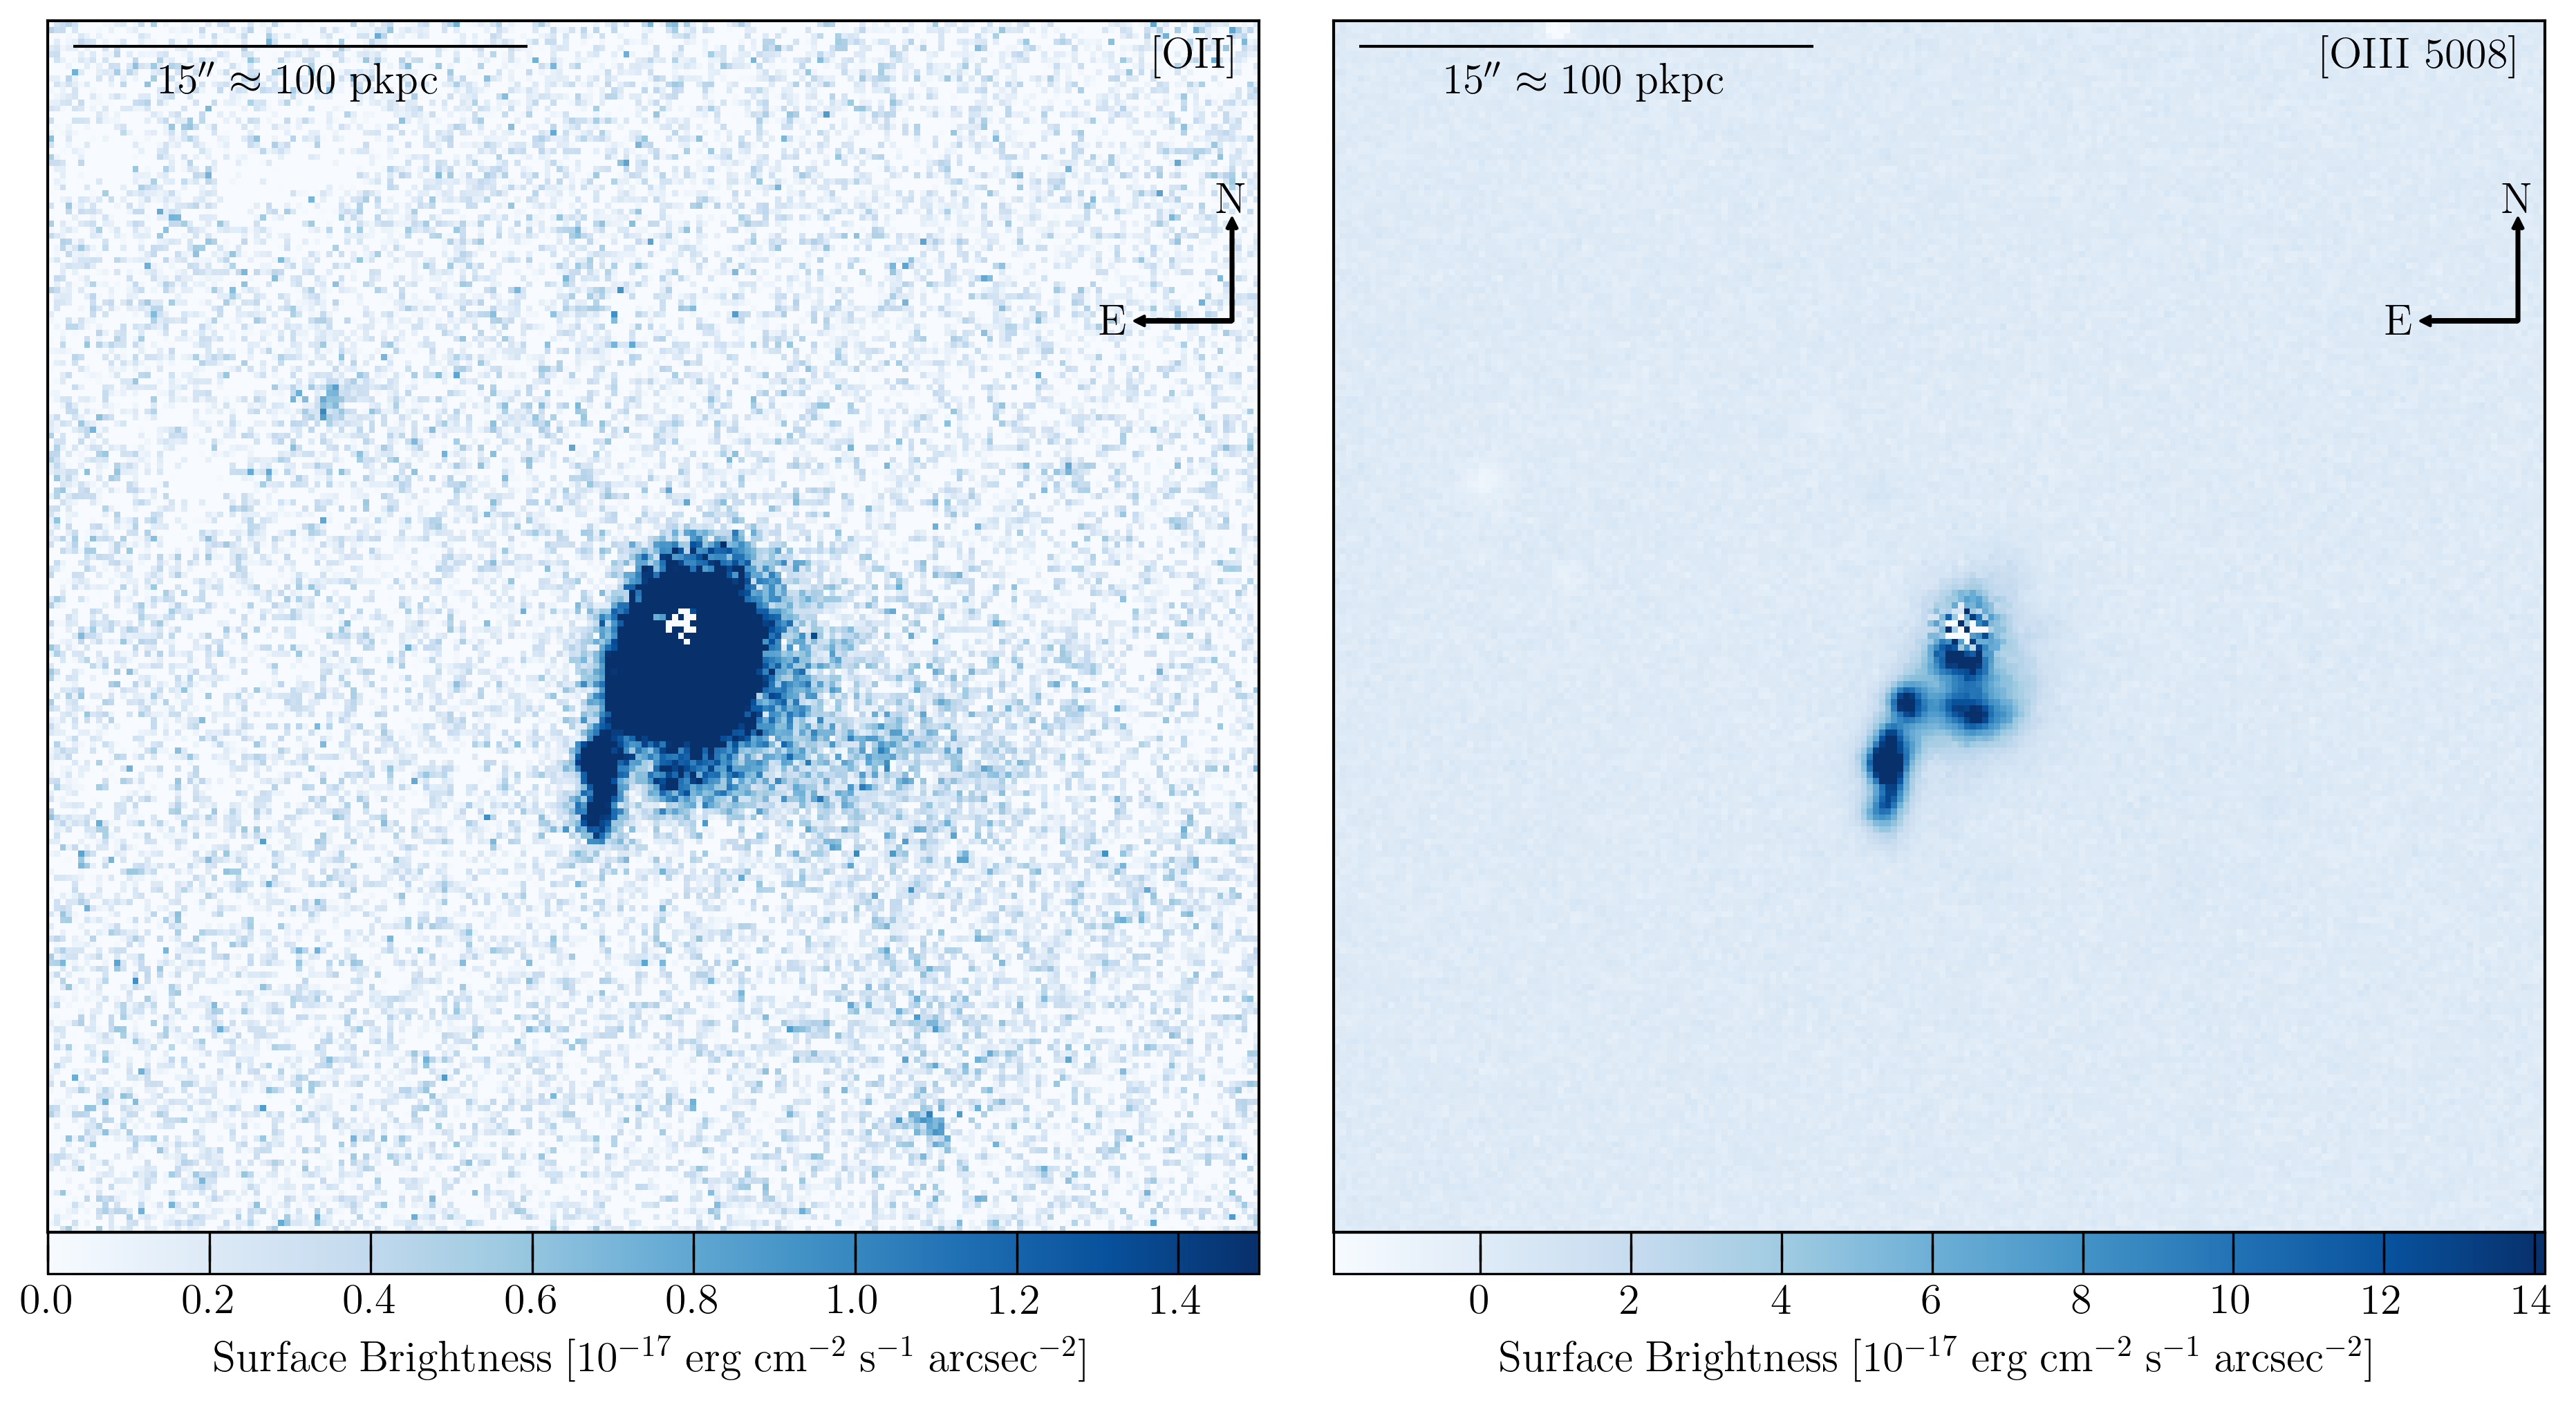

In [273]:
import os
import aplpy
import numpy as np
import matplotlib as mpl
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from matplotlib.colors import ListedColormap
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=True)
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10

Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)


# Convert Fits file into correct form
def ConvertFits(filename='image_OIII_5008_line_SB_offset'):
    path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', filename + '.fits')
    data, hdr = fits.getdata(path, 1, header=True)
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', data, overwrite=True)
    data1, hdr1 = fits.getdata('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', 0, header=True)
    hdr1['BITPIX'], hdr1['NAXIS'], hdr1['NAXIS1'], hdr1['NAXIS2'] = hdr['BITPIX'], hdr['NAXIS'], hdr['NAXIS1'], hdr['NAXIS2']
    hdr1['CRPIX1'], hdr1['CRPIX2'], hdr1['CTYPE1'], hdr1['CTYPE2'] = hdr['CRPIX1'], hdr['CRPIX2'], hdr['CTYPE1'], hdr['CTYPE2']
    hdr1['CRVAL1'], hdr1['CRVAL2'], hdr1['LONPOLE'], hdr1['LATPOLE'] = hdr['CRVAL1'], hdr['CRVAL2'], hdr['LONPOLE'], hdr['LATPOLE']
    hdr1['CSYER1'], hdr1['CSYER2'], hdr1['MJDREF'], hdr1['RADESYS'] = hdr['CSYER1'], hdr['CSYER2'], hdr['MJDREF'], hdr['RADESYS']
    hdr1['CD1_1'], hdr1['CD1_2'], hdr1['CD2_1'], hdr1['CD2_2'] =  hdr['CD1_1'], hdr['CD1_2'], hdr['CD2_1'], hdr['CD2_2']
    # Rescale the data by 1e17
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', data1 * 1e17, hdr1, overwrite=True)
# ConvertFits(filename='image_OII_line_SB_offset')


# QSO property
z = 0.6282144177077355
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
d_l = cosmo.angular_diameter_distance(z=z)
ratio = (1 * u.radian).to(u.arcsec).value
arcsec_15 = (15 * d_l / ratio).to(u.kpc).value
# print(arcsec_15)

path_OII = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OII_line_SB_offset_revised.fits')
path_OIII_4960 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_4960_line_SB_offset_revised.fits')
path_OIII_5008 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_5008_line_SB_offset_revised.fits')

fig = plt.figure(figsize=(16, 8), dpi=300)
plt.subplots_adjust(wspace=0.)
gc = aplpy.FITSFigure(path_OII, figure=fig, subplot=(1, 2, 1), north=True)
gc.set_system_latex(True)
gc.show_colorscale(vmin=0, vmax=1.5, cmap=newcmp)
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.0)
gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.95, 0.97, r'[OII]', size=15, relative=True)
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)

# gc = aplpy.FITSFigure(path_OIII_4960, figure=fig, subplot=(1, 3, 2), north=True)
# gc.set_system_latex(True)
# gc.show_colorscale(cmap=newcmp)
# gc.add_colorbar()
# gc.ticks.set_length(30)
# # gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
# gc.colorbar.set_location('bottom')
# gc.colorbar.set_pad(0.0)
# gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
# gc.colorbar.set_font(size=15)
# gc.colorbar.set_axis_label_font(size=15)
# gc.add_scalebar(length=15 * u.arcsecond)
# gc.scalebar.set_corner('top left')
# gc.scalebar.set_label(r"$15'' \approx 102 \mathrm{\; pkpc}$")
# gc.scalebar.set_font_size(15)
# gc.ticks.hide()
# gc.tick_labels.hide()
# gc.axis_labels.hide()
# gc.add_label(0.90, 0.97, r'[OIII 4960]', size=15, relative=True)
# xw, yw = gc.pixel2world(195, 150)
# gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
# gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
# gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
# gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
# # plt.savefig('/Users/lzq/Dropbox/Data/CGM_plots/OIII_image.pdf', bbox_inches='tight')

gc = aplpy.FITSFigure(path_OIII_5008, figure=fig, subplot=(1, 2, 2), north=True)
gc.set_system_latex(True)
gc.show_colorscale(cmap=newcmp)
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.0)
gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.90, 0.97, r'[OIII 5008]', size=15, relative=True)
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
fig.savefig('/Users/lzq/Dropbox/Data/CGM_plots/Narrow_band_image_talk.pdf', bbox_inches='tight')



[INFO] 81 x 200 x 200 Cube (/Users/lzq/Dropbox/Data/CGM/CUBE_OII_line_offset.fits)
[INFO] .data(81 x 200 x 200) (1e-20 erg / (Angstrom cm2 s)), .var(81 x 200 x 200)
[INFO] center:(-18:51:51.39005861,02:40:32.61740697) size:(40.000",40.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:6019.60 max:6119.60 step:1.25 Angstrom
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


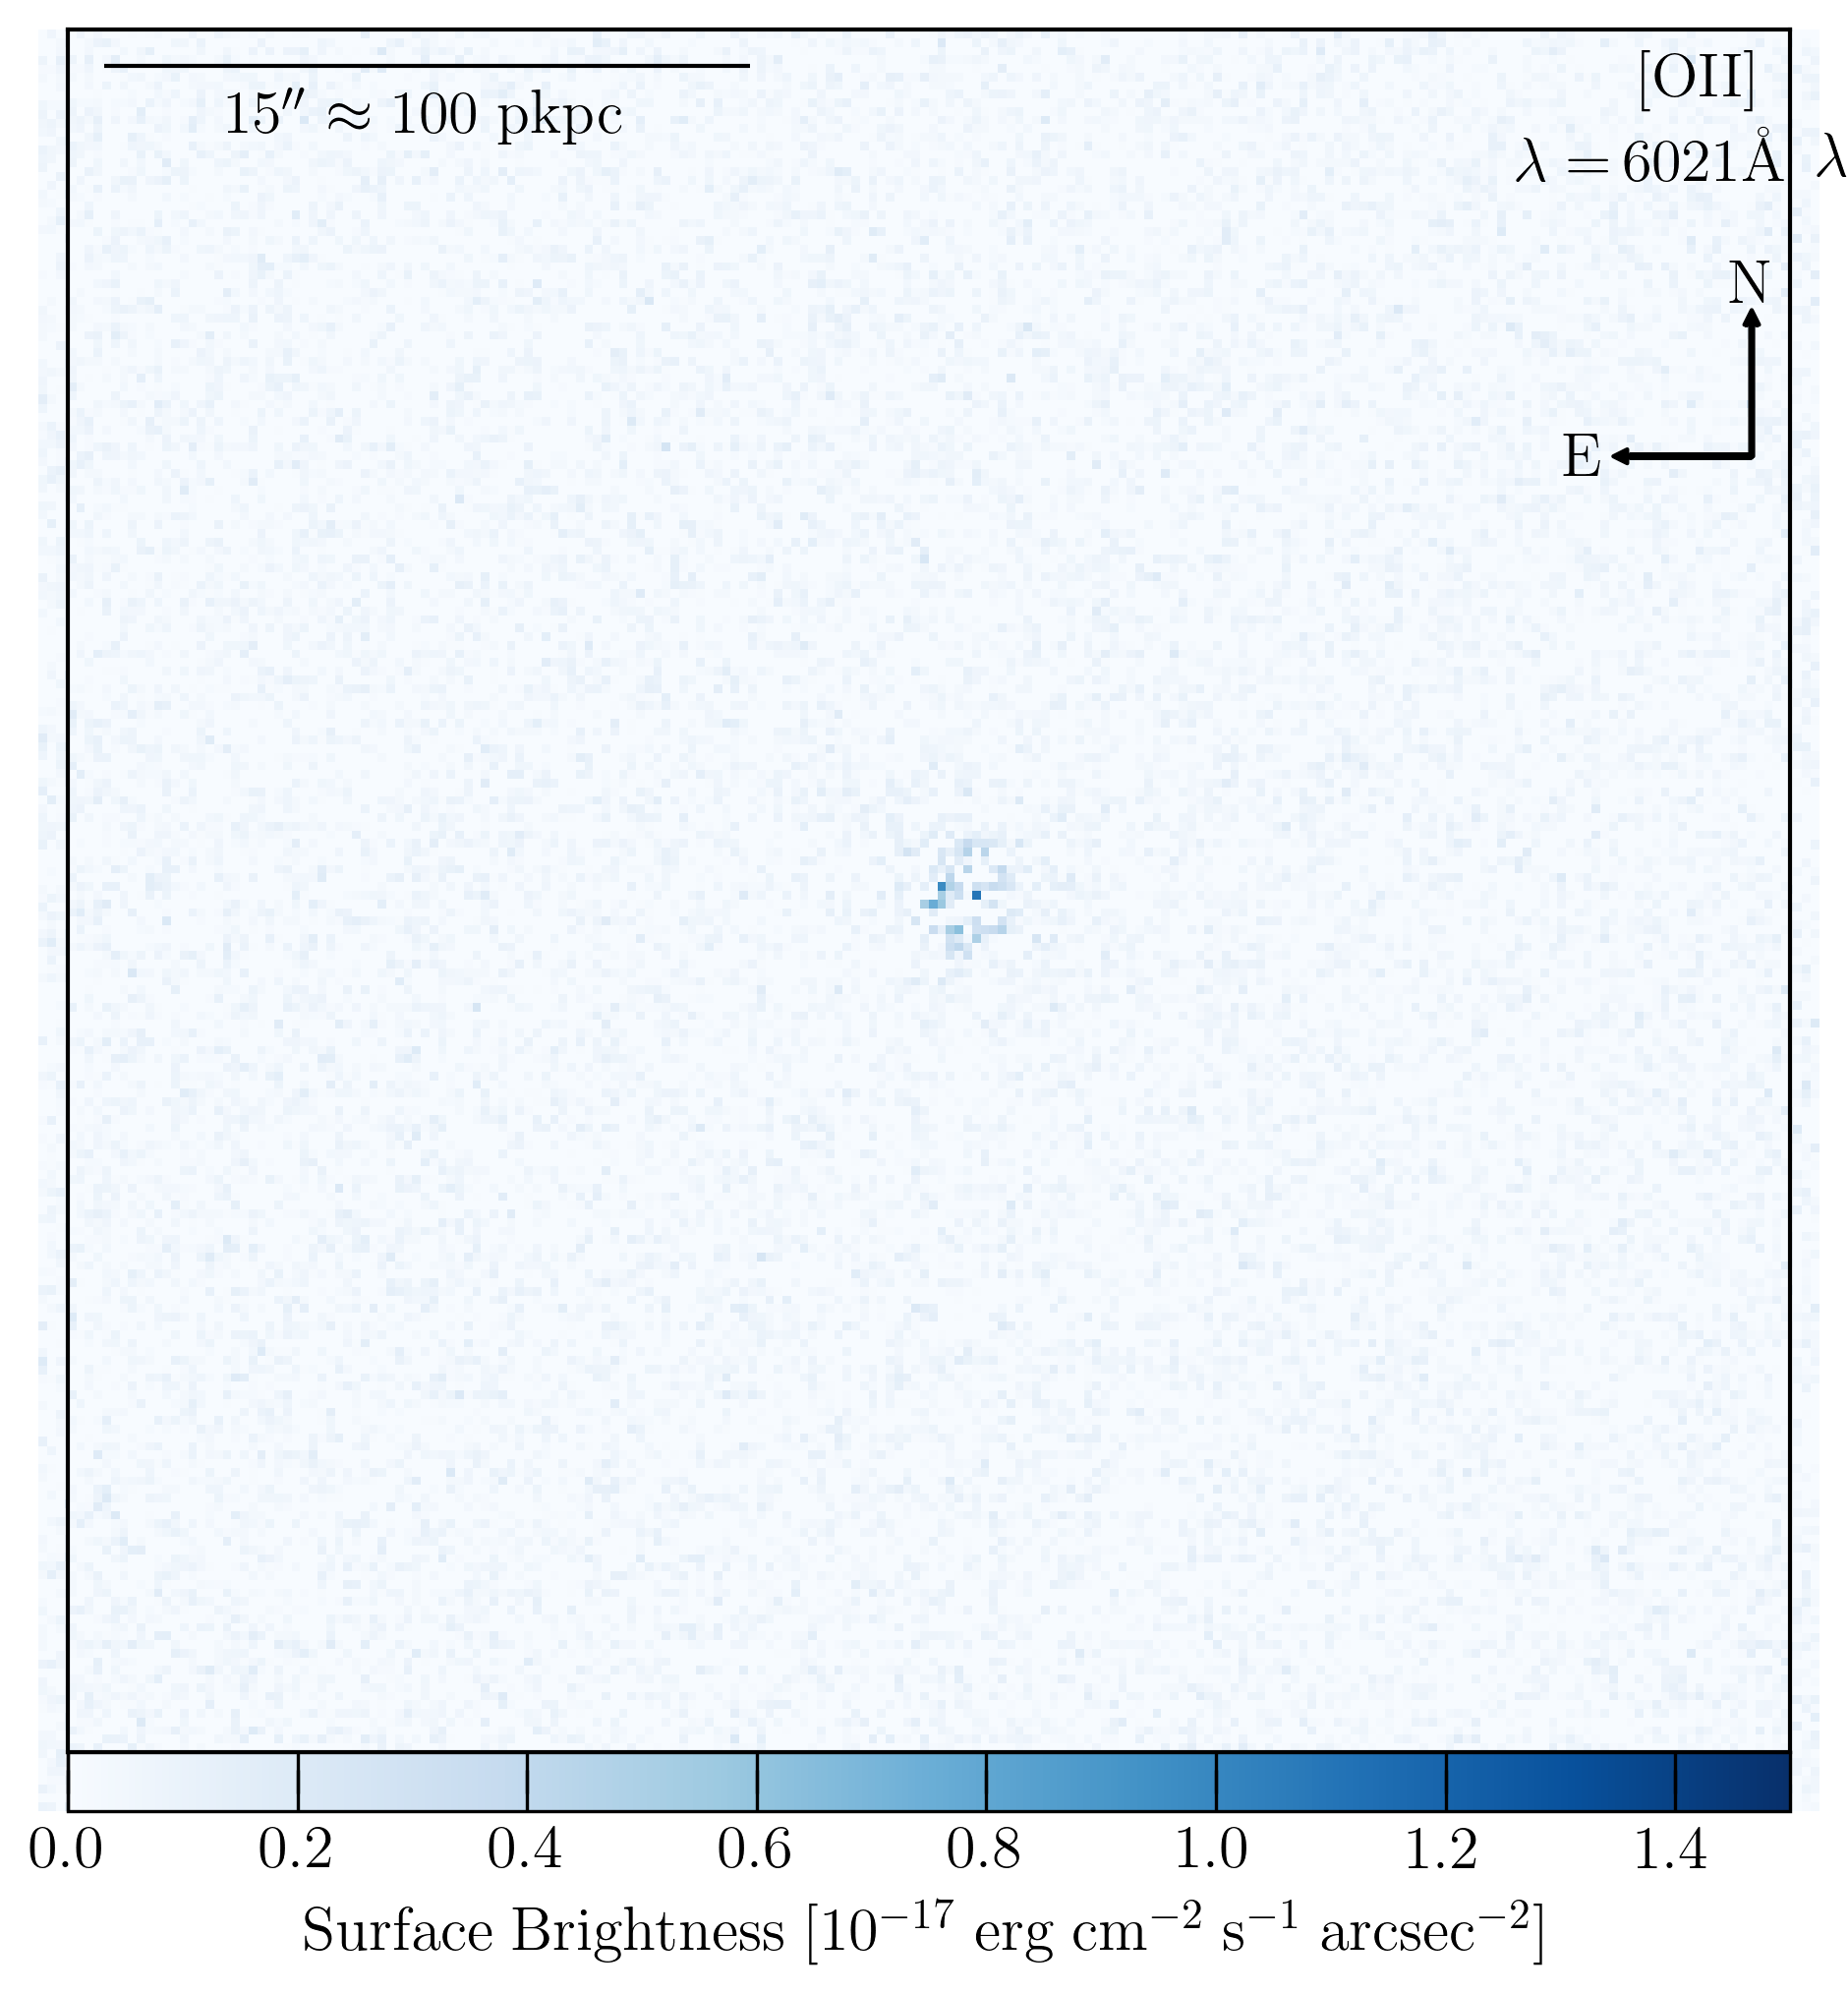

In [158]:
# Make a movie
from celluloid import Camera
from matplotlib import animation
from mpdaf.obj import Cube, WCS, WaveCoord, iter_spe

# # each pixel is 1.25 Angstroms

# def frame(N):
#     sub_cube = cube.select_lambda(6020 + i)
#     sub_cube = sub_cube * 1.25 * 1e-20 / 0.2 / 0.2  
#     sub_cube.write('/Users/lzq/Dropbox/Data/CGM/image_lunch_talk.fits')
#     ConvertFits(filename='image_lunch_talk')
#     path_subcube = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_lunch_talk_revised.fits')
#     fig = plt.figure(figsize=(8, 8), dpi=300)
#     gc = aplpy.FITSFigure(path_subcube, figure=fig, subplot=(1, 2, 1), north=True)
#     gc.set_system_latex(True)
#     gc.show_colorscale(vmin=0, vmax=1.5, cmap=newcmp)
#     gc.add_colorbar()
#     gc.ticks.set_length(30)
#     # gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
#     gc.colorbar.set_location('bottom')
#     gc.colorbar.set_pad(0.0)
#     gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
#     gc.colorbar.set_font(size=15)
#     gc.colorbar.set_axis_label_font(size=15)
#     gc.add_scalebar(length=15 * u.arcsecond)
#     gc.scalebar.set_corner('top left')
#     gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
#     gc.scalebar.set_font_size(15)
#     gc.ticks.hide()
#     gc.tick_labels.hide()
#     gc.axis_labels.hide()
#     gc.add_label(0.95, 0.97, r'[OII]', size=15, relative=True)
#     xw, yw = gc.pixel2world(195, 150)
#     gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
#     gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
#     gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
#     gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
    # camera.snap()
# animation = camera.animate()

path_cube_OII = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'CUBE_OII_line_offset.fits')
cube = Cube(path_cube_OII)
path_cube_OIII = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'CUBE_OIII_5008_line_offset.fits')
cube_OIII = Cube(path_cube_OIII)
cube.info()

# O2
fig = plt.figure(figsize=(8, 8), dpi=300)
# f1 = fig.add_subplot(111, frameon=False)
camera = Camera(fig)
# frames = []
for i in range(1, 2):
    wave_i = 6019.6 + 2 * i
    wave_f = 6019.6 + 2 * (i + 1)
    sub_cube = cube.select_lambda(wave_i, wave_f)
    sub_cube = sub_cube.sum(axis=0) * 1.25 * 1e-20 / 0.2 / 0.2  
#     sub_cube.write('/Users/lzq/Dropbox/Data/CGM/image_lunch_talk_' + str(i) + '.fits')
#     ConvertFits(filename='image_lunch_talk_' + str(i))
#     path_subcube = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_lunch_talk_' 
#                                 + str(i) + '_revised.fits')
#     sub_cube.write('/Users/lzq/Dropbox/Data/CGM/image_lunch_talk.fits')
#     ConvertFits(filename='image_lunch_talk')
#     path_subcube = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_lunch_talk_revised.fits')
#     plt.imshow(fits.getdata(path_subcube, 0, ignore_missing_end=True), vmin=0, vmax=1.5, cmap=newcmp, origin='lower')
#     plt.annotate(r'[OII]', xy=(0.80, 0.82), xycoords='figure fraction', size=15)
#     plt.annotate(r'$\mathrm{\lambda = \,}$' + str(int(wave_i)) + r'$\mathrm{\AA}$', xy=(0.77, 0.77), xycoords='figure fraction', size=15)
#     plt.axis('off')
    gc = aplpy.FITSFigure(path_subcube, figure=fig, north=True, animated=True)
    gc.set_system_latex(True)
    gc.show_colorscale(vmin=0, vmax=1.5, cmap=newcmp)
    gc.add_colorbar()
    gc.ticks.set_length(30)
    # gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
    gc.colorbar.set_location('bottom')
    gc.colorbar.set_pad(0.0)
    gc.colorbar.set_axis_label_text(r'$\mathrm{Surface \; Brightness \; [10^{-17} \; erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$')
    gc.colorbar.set_font(size=15)
    gc.colorbar.set_axis_label_font(size=15)
    gc.add_scalebar(length=15 * u.arcsecond)
    gc.scalebar.set_corner('top left')
    gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
    gc.scalebar.set_font_size(15)
    gc.ticks.hide()
    gc.tick_labels.hide()
    gc.axis_labels.hide()
    gc.add_label(0.95, 0.97, r'[OII]', size=15, relative=True)
    gc.add_label(0.92, 0.92, r'$\mathrm{\lambda = \,}$' + str(int(wave_i)) + r'$\mathrm{\AA}$', size=15, relative=True)
    xw, yw = gc.pixel2world(195, 150)
    gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
    gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
    gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
    gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
    camera.snap()
    # plt.clf() 
#     else:
#         gc = aplpy.FITSFigure(path_subcube, figure=fig, north=True)
#         gc.show_colorscale(vmin=0, vmax=1.5, cmap=newcmp)
#         # plt.show()
#     # plt.imshow(fits.getdata(path_subcube, 0, ignore_missing_end=True))
#         camera.snap()
    # gc.close()
    # frames.append([gc])

# animation = animation.ArtistAnimation(fig, frames)
animation = camera.animate()
animation.save('animation.mp4')

In [3]:
# from matplotlib import rc
# # equivalent to rcParams['animation.html'] = 'html5'
# rc('animation', html='html5')

In [4]:
# from matplotlib import animation
# # frames
# ani = animation.ArtistAnimation(fig, frames)
# ani.save('animation.mp4')

NameError: name 'frames' is not defined

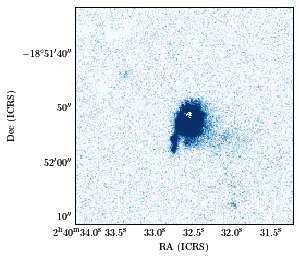

In [96]:
# import matplotlib
# from matplotlib import pyplot as plt
# from celluloid import Camera

# fig = plt.figure()
# camera = Camera(fig)
# for i in range(5):
#     t = plt.plot(range(i, i + 5))
#     plt.legend(t, [f'line {i}'])
#     camera.snap()
# animation = camera.animate()
# animation



fig = plt.figure()
path_subcube = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_lunch_talk_revised.fits')
gc = aplpy.FITSFigure(path_subcube, figure=fig, north=True)
gc.show_colorscale(vmin=0, vmax=1.5, cmap=newcmp)
# plt.show()
# plt.clf() 
# fig = plt.figure()
# gc.hide_colorscale()
path_subcube = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OII_line_SB_offset_revised.fits')
gc = aplpy.FITSFigure(path_subcube, figure=fig, north=True)
gc.show_colorscale(vmin=0, vmax=1.5, cmap=newcmp)
plt.show()

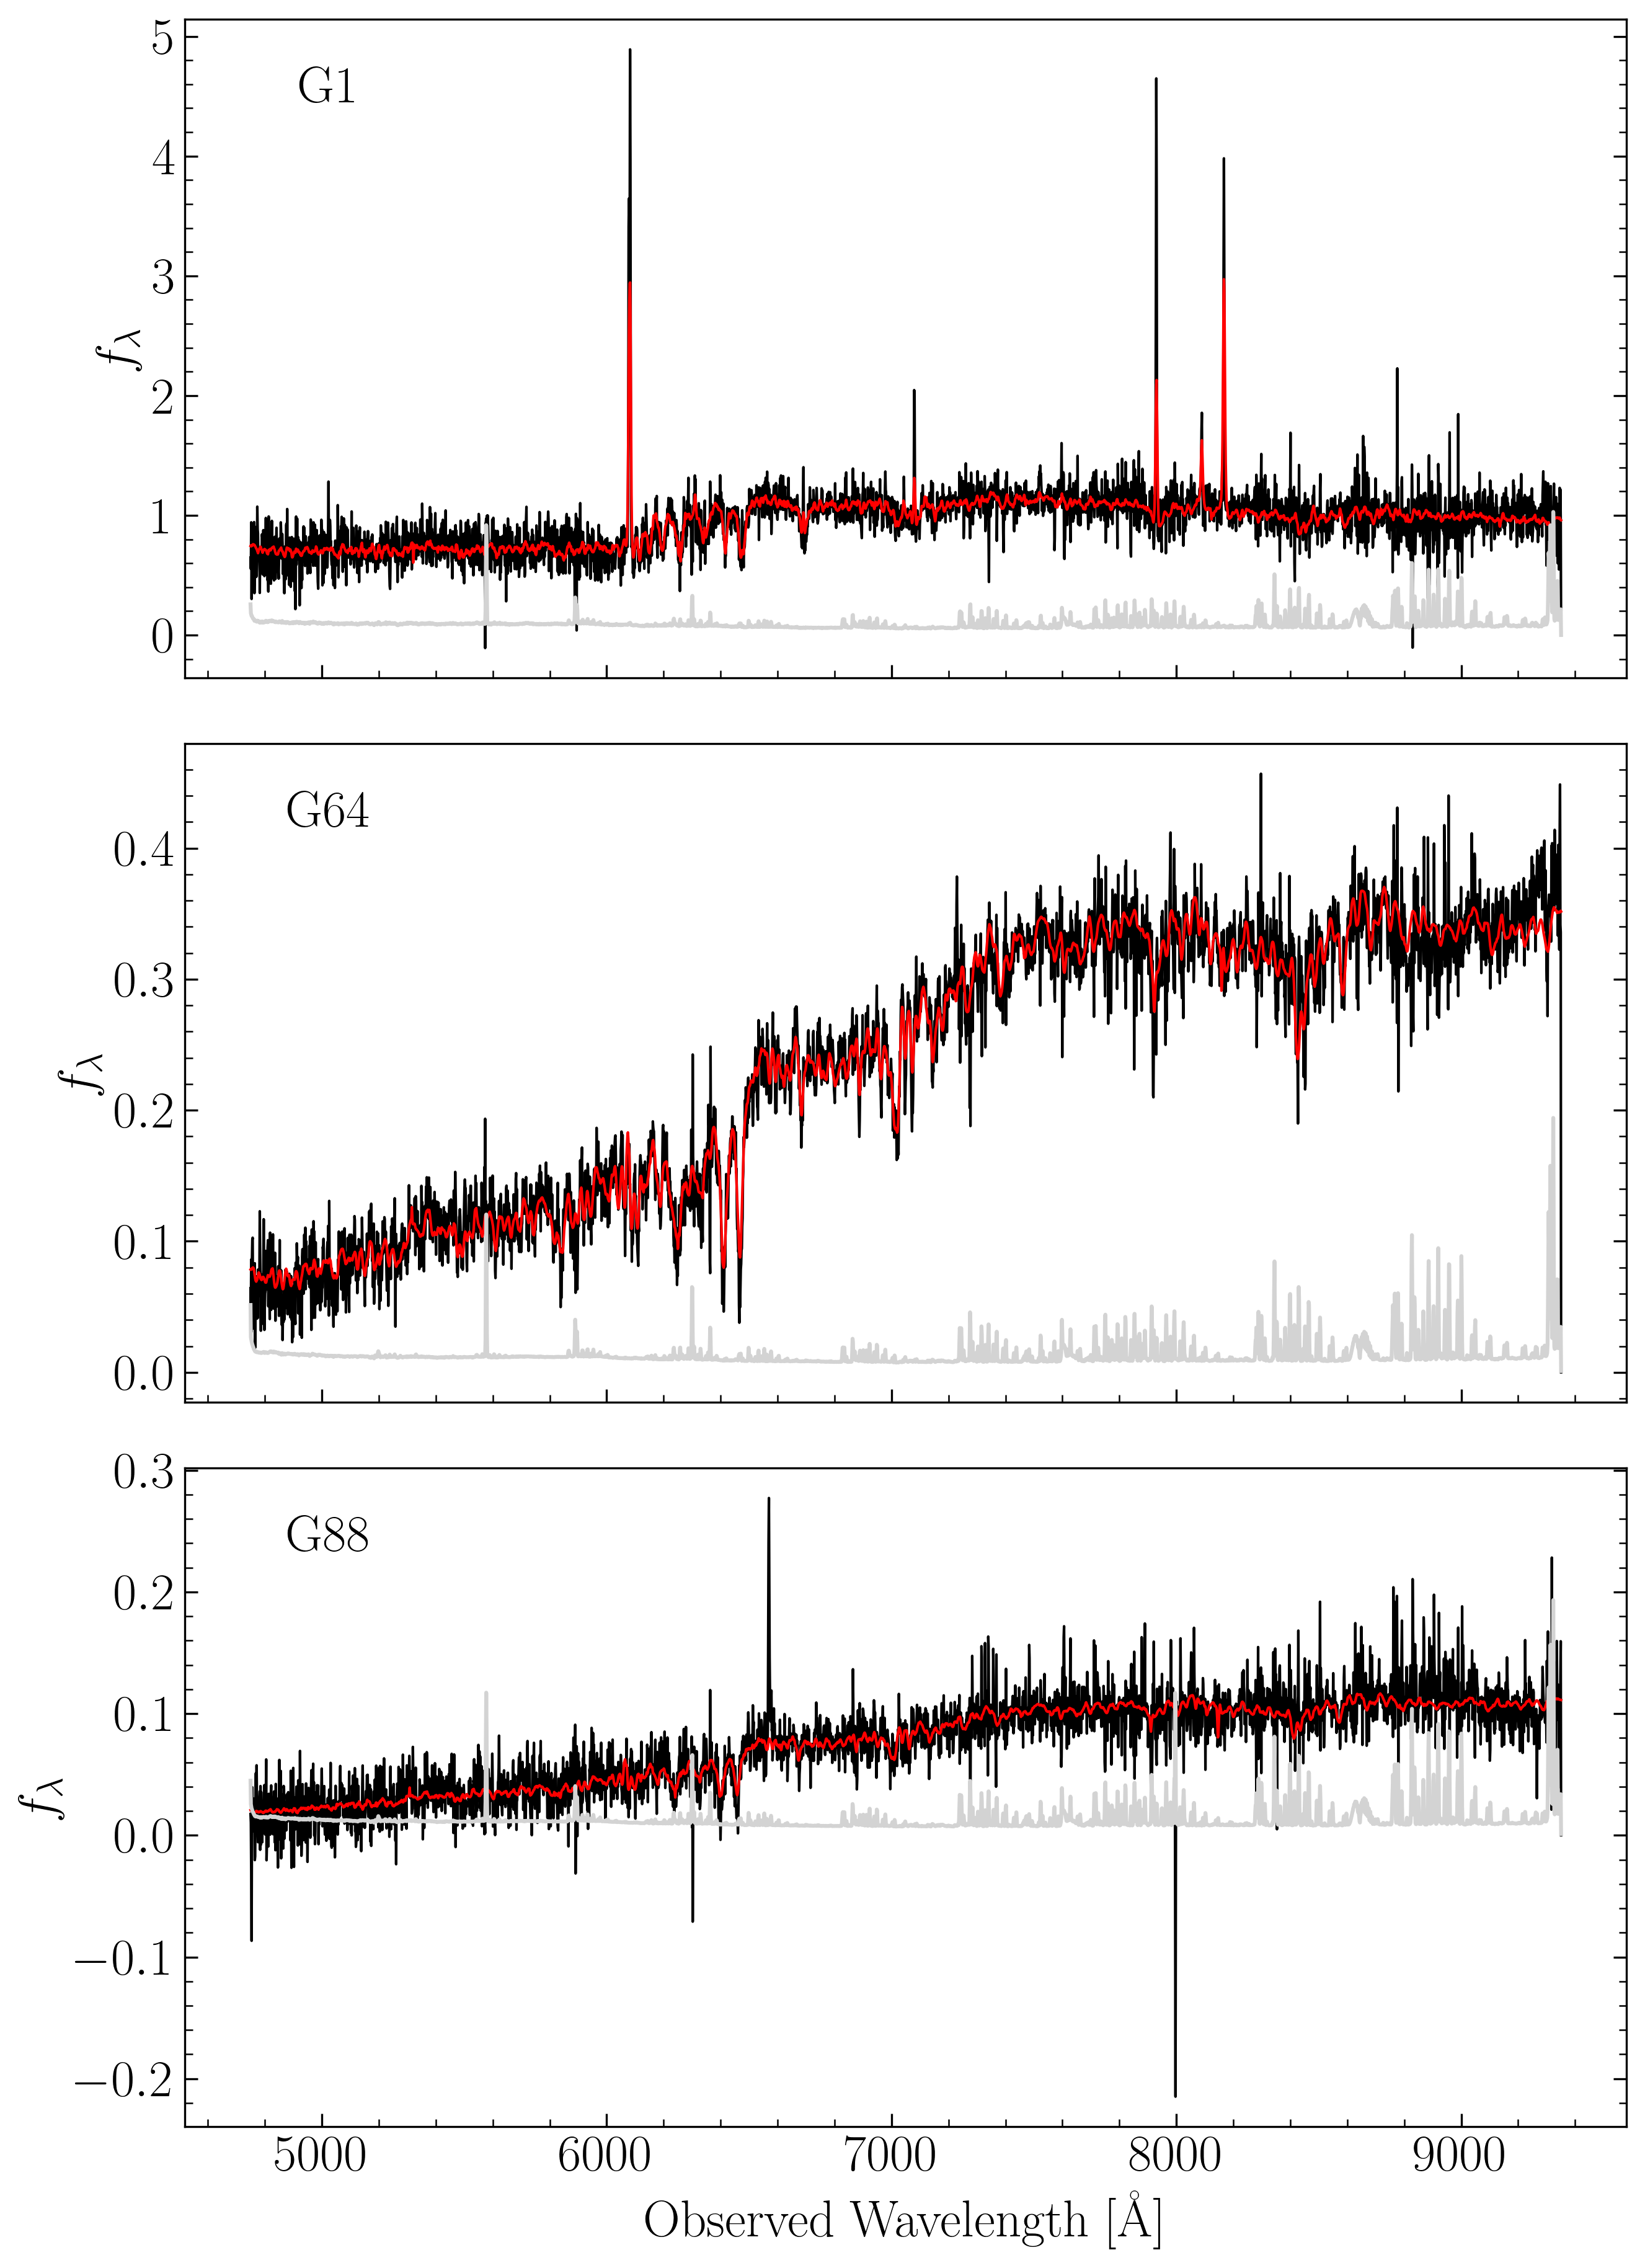

In [142]:
# ID_final = 
from astropy.table import Table
from PyAstronomy import pyasl

path_1 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D',
                        '1_20002_J024034.53-185135.09_spec1D.fits')
spec = Table.read(path_1)
wave_1 = pyasl.vactoair2(spec['wave'])
flux_1 = spec['flux'] * 1e-3
model_1 = spec['model'] * 1e-3
flux_err_1 = spec['error'] * 1e-3

path_2 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D',
                        '64_271_J024032.03-185139.81_spec1D.fits')
spec = Table.read(path_2)
wave_2 = pyasl.vactoair2(spec['wave'])
flux_2 = spec['flux'] * 1e-3
model_2 = spec['model'] * 1e-3
flux_err_2 = spec['error'] * 1e-3

path_3 = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D',
                        '88_301_J024030.95-185143.68_spec1D.fits')
spec = Table.read(path_3)
wave_3 = pyasl.vactoair2(spec['wave'])
flux_3 = spec['flux'] * 1e-3
model_3 = spec['model'] * 1e-3
flux_err_3 = spec['error'] * 1e-3



fig, axarr = plt.subplots(3, 1, figsize=(10, 15), sharex=True, dpi=300)
plt.subplots_adjust(hspace=0.1)
axarr[0].plot(wave_1, flux_1, color='k', lw=1)
axarr[0].plot(wave_1, model_1, color='r', lw=1)
axarr[0].plot(wave_1, flux_err_1, color='lightgrey')
axarr[1].plot(wave_2, flux_2, color='k', lw=1)
axarr[1].plot(wave_2, model_2, color='r', lw=1)
axarr[1].plot(wave_2, flux_err_2, color='lightgrey')
axarr[2].plot(wave_3, flux_3, color='k', lw=1)
axarr[2].plot(wave_3, model_3, color='r', lw=1)
axarr[2].plot(wave_3, flux_err_3, color='lightgrey')
axarr[0].set_title('G1', x=0.1, y=0.85, size=20)
axarr[1].set_title('G64', x=0.1, y=0.85, size=20)
axarr[2].set_title('G88', x=0.1, y=0.85, size=20)
axarr[0].minorticks_on()
axarr[1].minorticks_on()
axarr[2].minorticks_on()
axarr[2].set_xlabel(r'$\mathrm{Observed \; Wavelength \; [\AA]}$', size=20)
axarr[0].set_ylabel(r'${f}_{\lambda}$', size=20)
axarr[1].set_ylabel(r'${f}_{\lambda}$', size=20)
axarr[2].set_ylabel(r'${f}_{\lambda}$', size=20)
axarr[0].tick_params(axis='both', which='major', direction='in', bottom='on', left='on', right='on', labelsize=20, size=5)
axarr[0].tick_params(axis='both', which='minor', direction='in', bottom='on', left='on', right='on', size=3)
axarr[1].tick_params(axis='both', which='major', direction='in', bottom='on', left='on', right='on', labelsize=20, size=5)
axarr[1].tick_params(axis='both', which='minor', direction='in', bottom='on', left='on', right='on', size=3)
axarr[2].tick_params(axis='both', which='major', direction='in', bottom='on', left='on', right='on', labelsize=20, size=5)
axarr[2].tick_params(axis='both', which='minor', direction='in', bottom='on', left='on', right='on', size=3)
fig.savefig('/Users/lzq/Dropbox/Data/CGM_plots/QSP_lunch_talk.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to -2.446e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.543e-02 [aplpy.core]


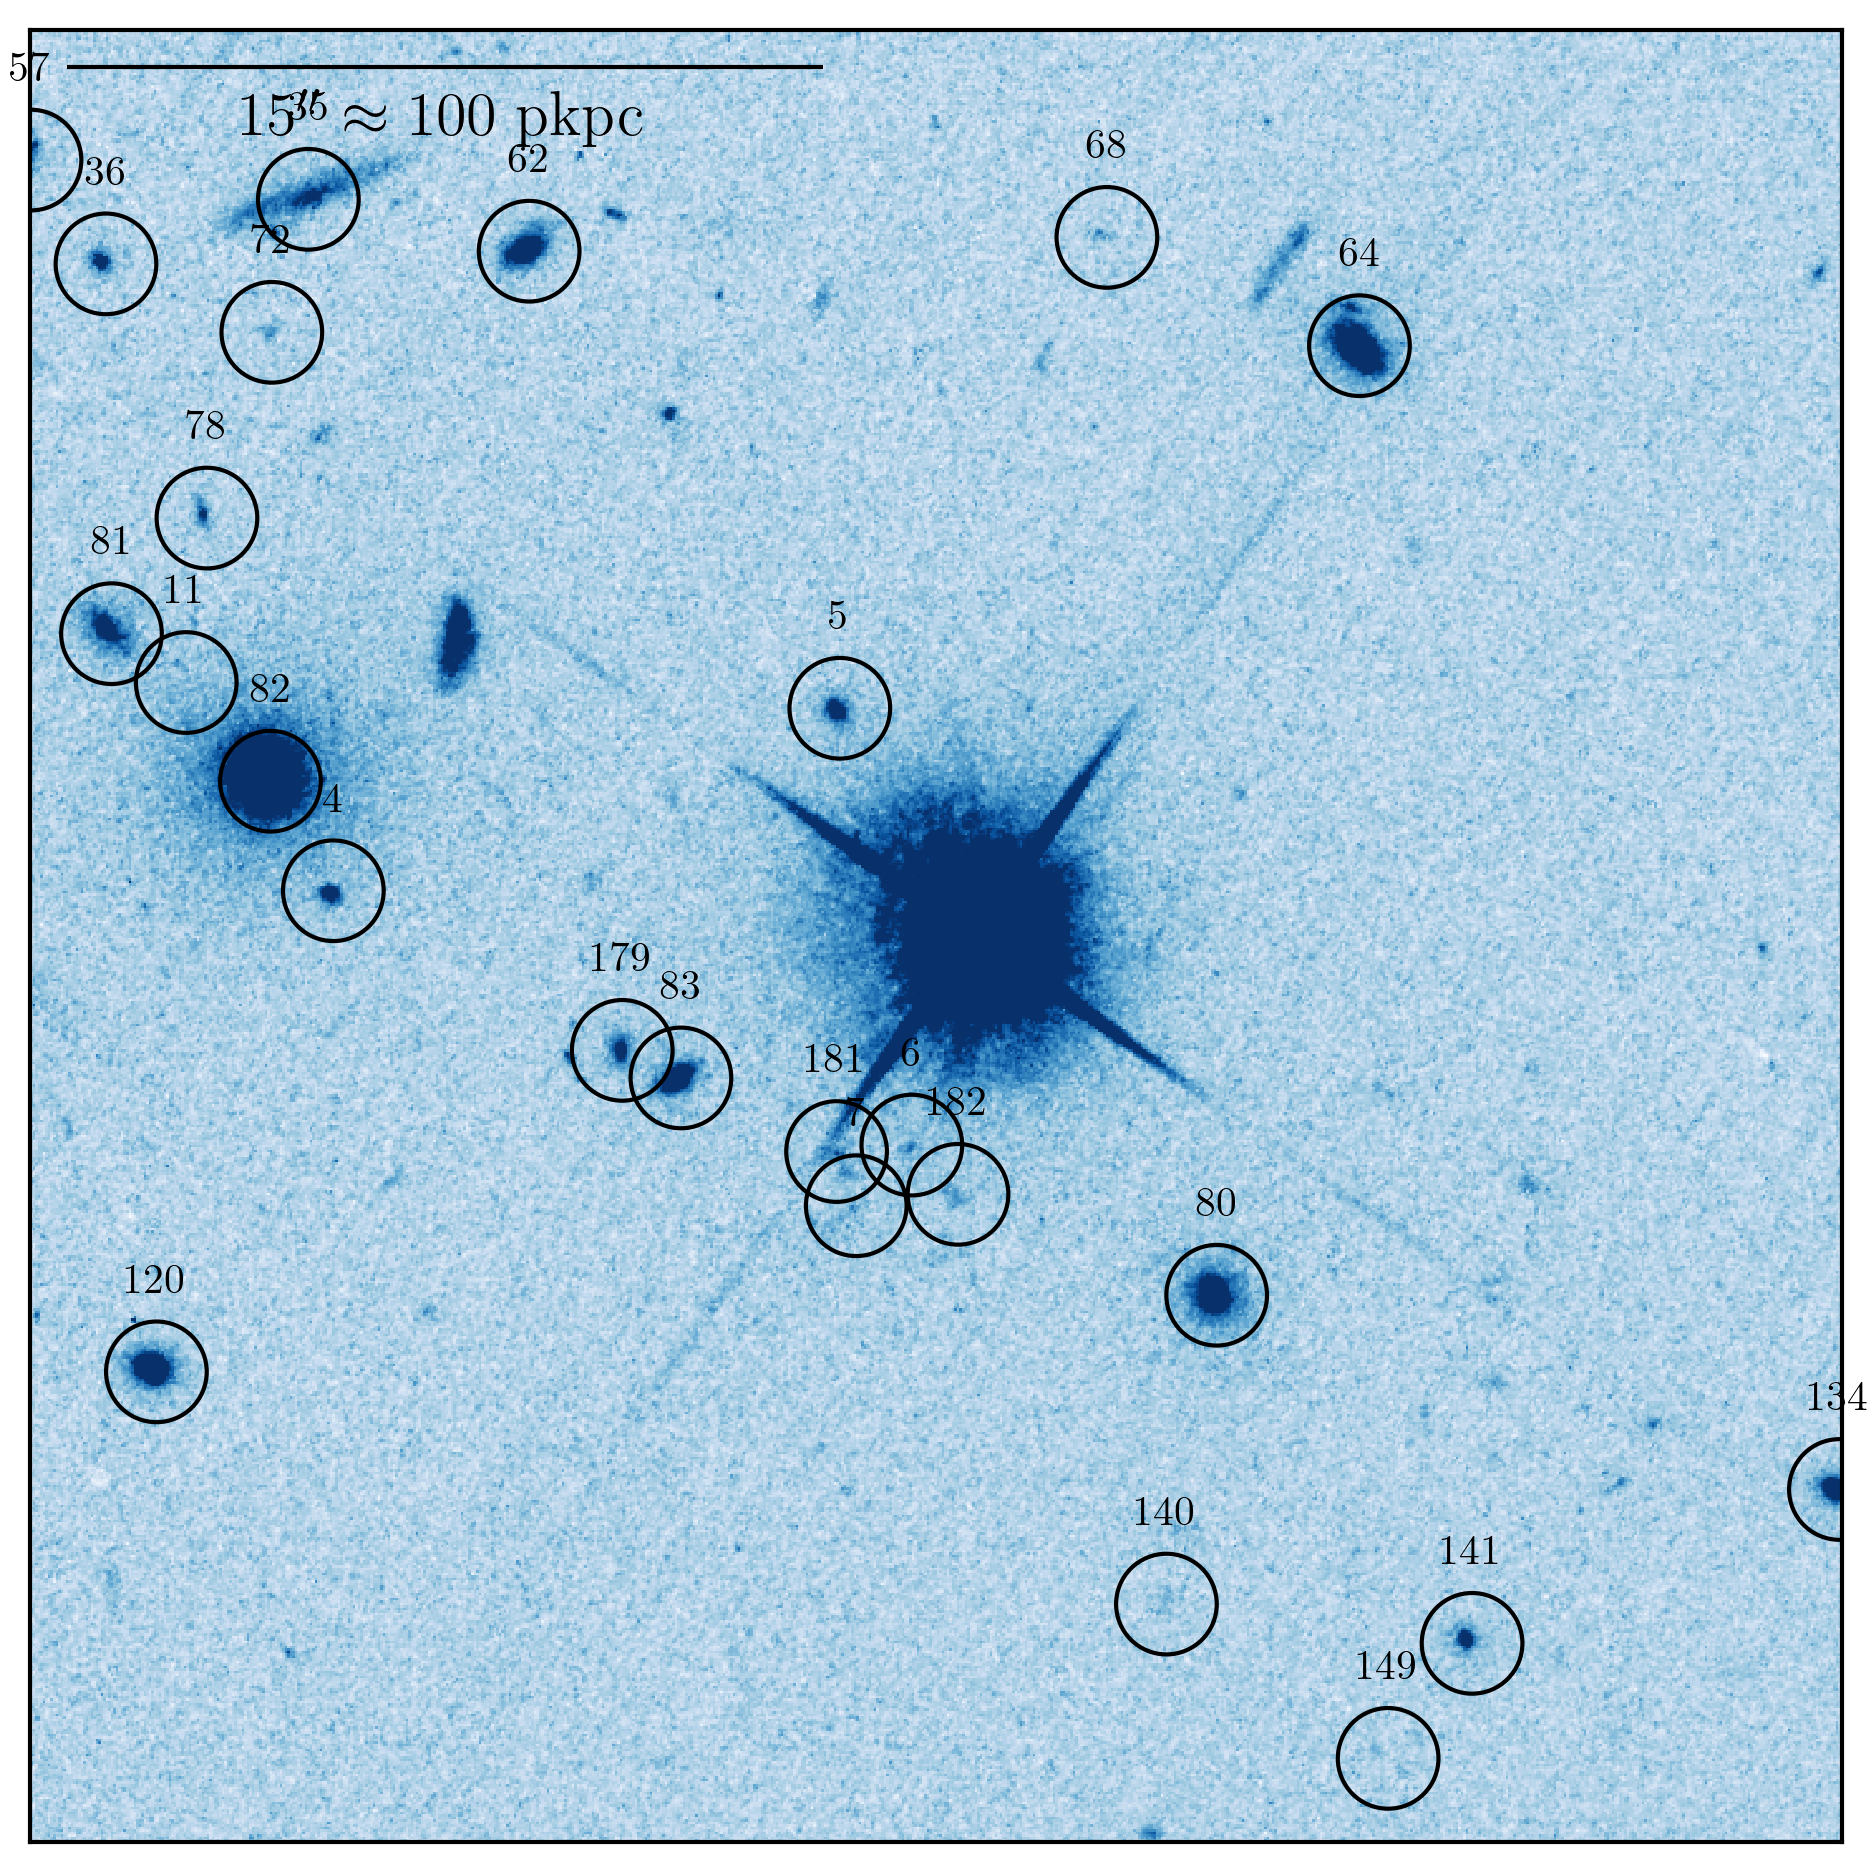

In [147]:
path_hb = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'HE0238-1904_drc_offset.fits')
data_hb = fits.getdata(path_hb, 1, ignore_missing_end=True)

fig = plt.figure(figsize=(8, 8), dpi=300)
gc = aplpy.FITSFigure(path_hb, figure=fig, north=True)
gc.set_xaxis_coord_type('scalar')
gc.set_yaxis_coord_type('scalar')
gc.recenter(40.1359, -18.8643, width=0.01, height=0.01)
gc.set_system_latex(True)
gc.show_colorscale(cmap=newcmp)
gc.ticks.set_length(30)
gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
xw, yw = 40.125973, -18.858134
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
# gc.add_label(0.971, 0.87, r'N', size=15, relative=True)
# gc.add_label(0.912, 0.805, r'E', size=15, relative=True)
fig.savefig('/Users/lzq/Dropbox/Data/CGM_plots/HST2_lunch_talk.pdf', bbox_inches='tight')

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")


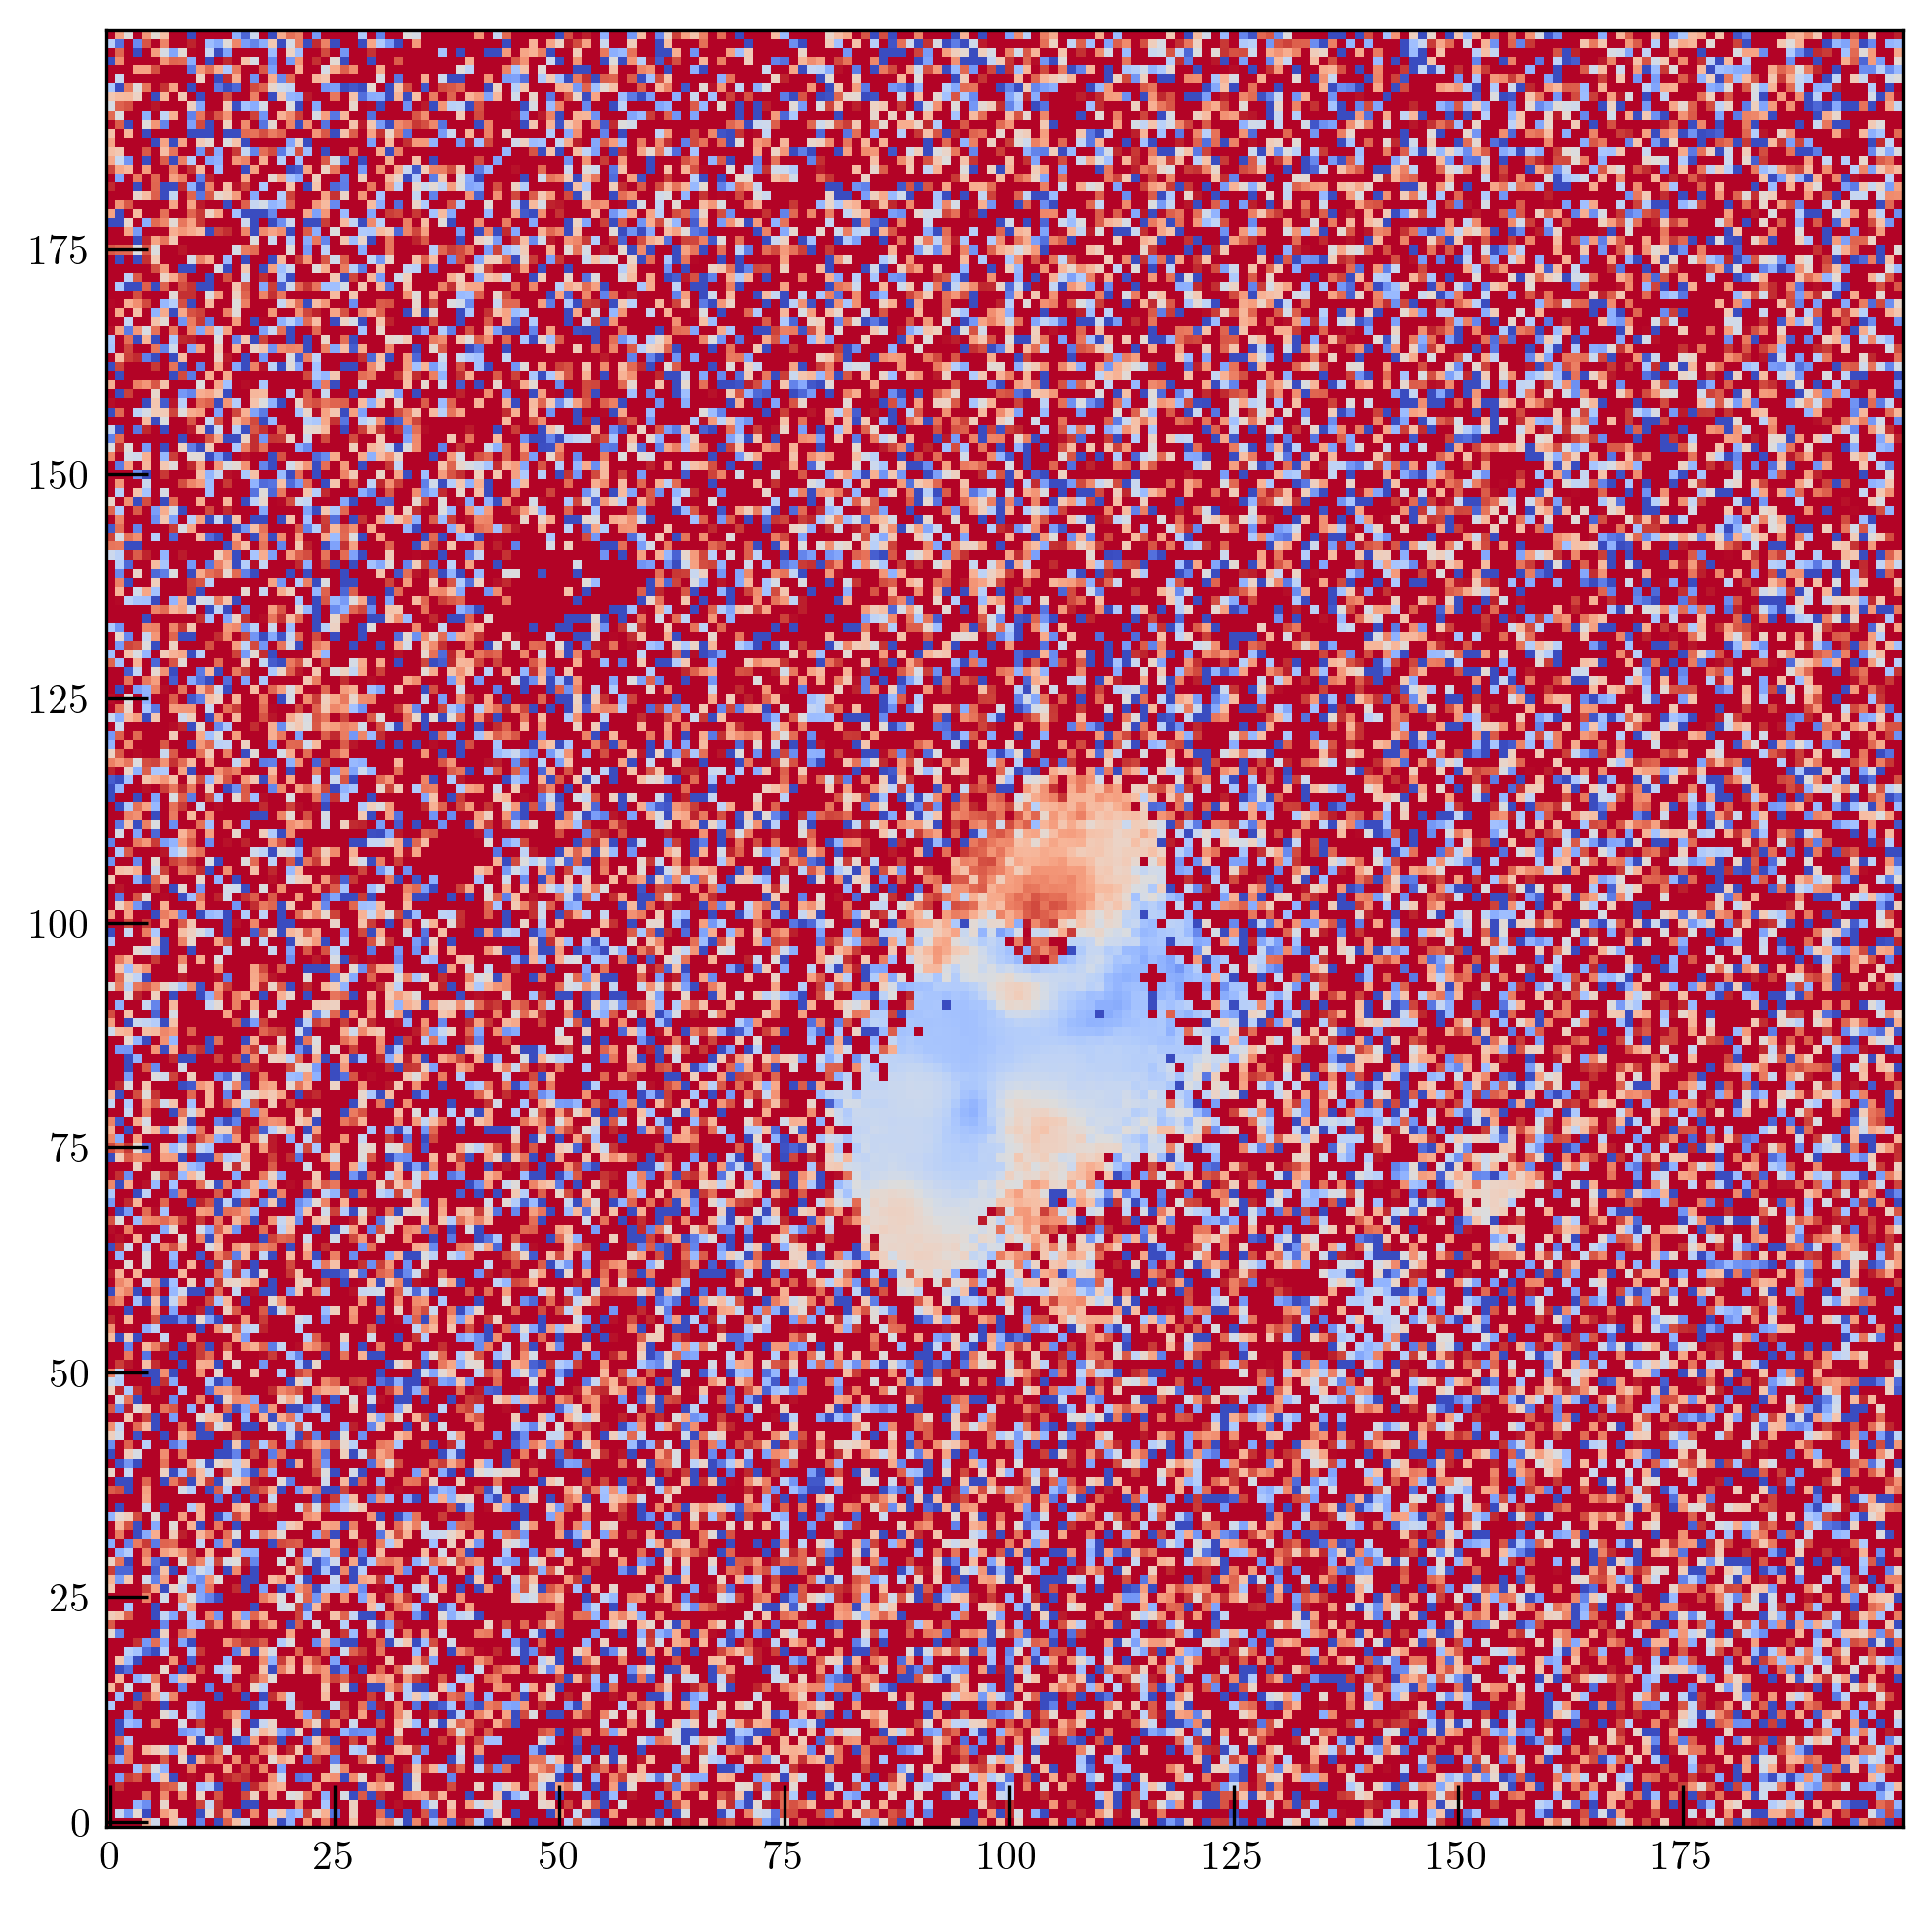

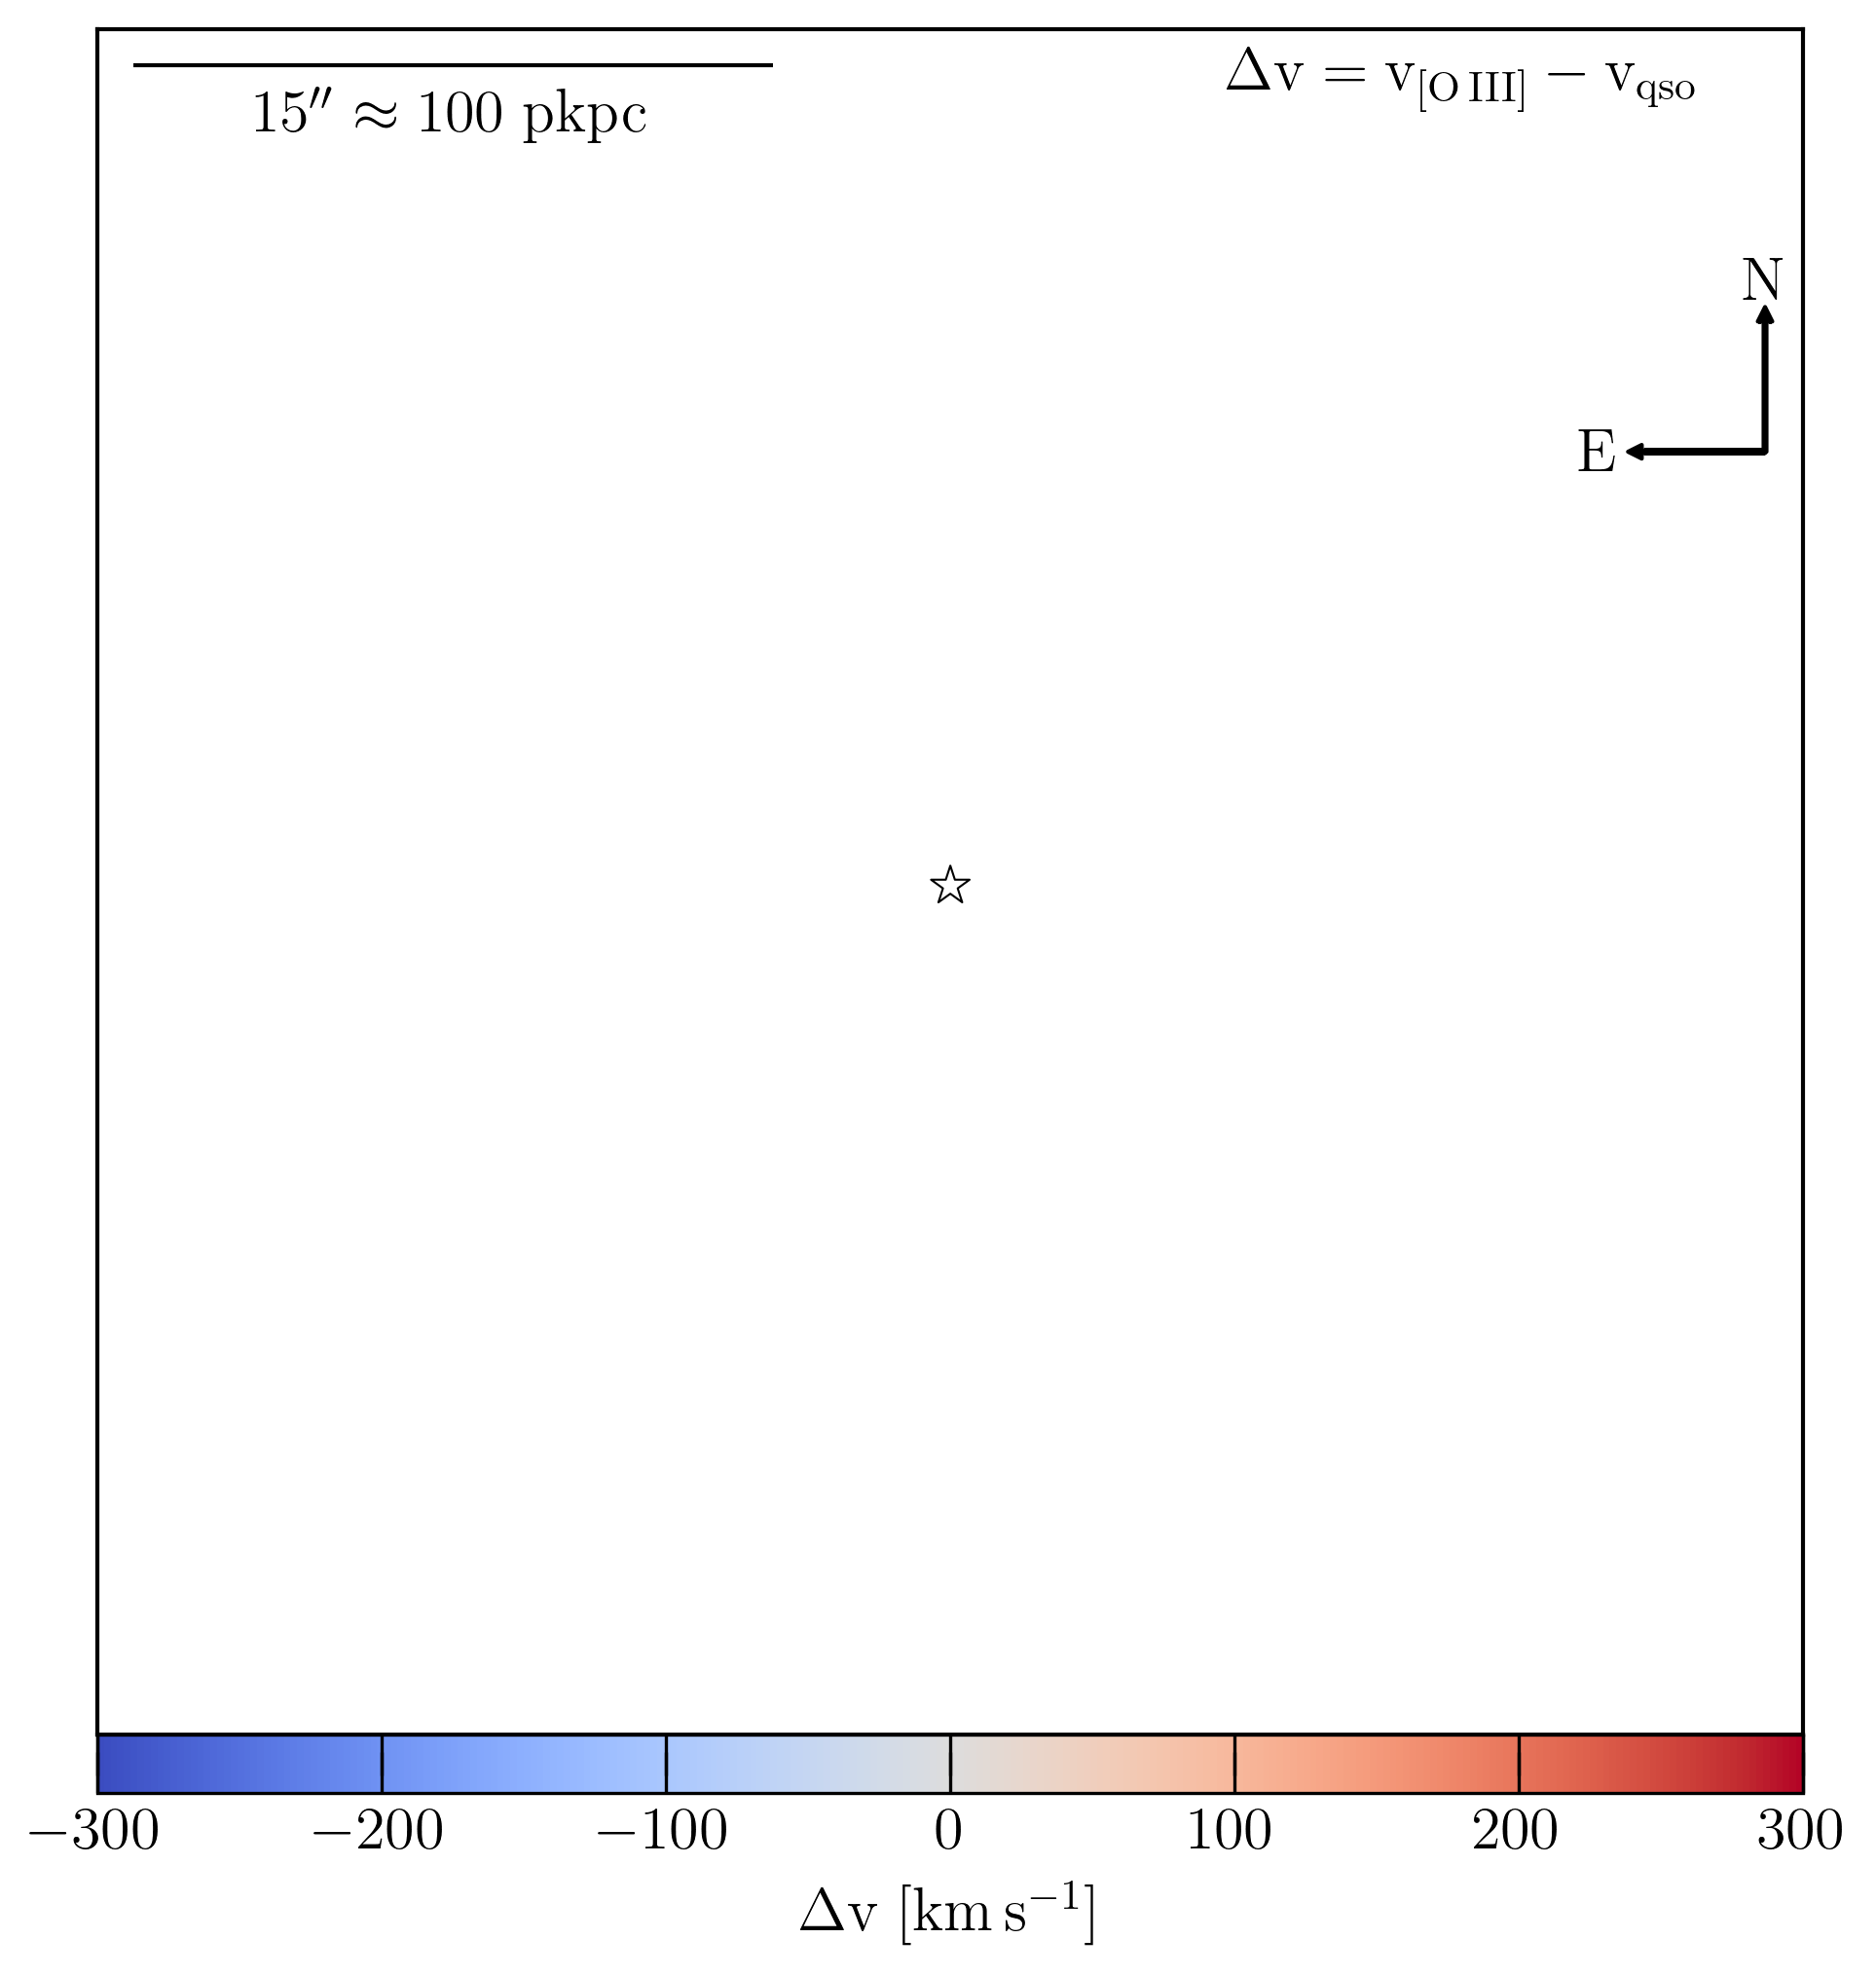

In [279]:
path_fit_info = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'fitOIII_info.fits')
path_fit_info_err = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'fitOIII_info_err.fits')
fit_info = fits.getdata(path_fit_info, 0, ignore_missing_end=True)
fit_info_err = fits.getdata(path_fit_info_err, 0, ignore_missing_end=True)

[z_fit, sigma_fit, flux_fit, a, b] = fit_info
[dz_fit, dsigma_fit, dflux_fit, da, db] = fit_info_err
print(flux_fit / dflux_fit)
z_qso = 0.6282144177077355
v_fit = 3e5 * (z_fit - z_qso) / (1 + z_qso)
plt.figure(figsize=(8, 8), dpi=300)
plt.imshow(v_fit, cmap='coolwarm', vmin=-300, vmax=300, origin='lower')
# v_fit = np.where((flux_fit < -0.02) | (flux_fit > 0.02), v_fit, np.nan)
v_fit = np.where((flux_fit / dflux_fit > 1), v_fit, np.nan)
# v_fit = np.where((v_fit < 10000) * (v_fit > -10000), v_fit, np.nan)

def ConvertFits(filename='image_OIII_5008_line_SB_offset', table=None):
    path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', filename + '.fits')
    data, hdr = fits.getdata(path, 1, header=True)
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', table, overwrite=True)
    data1, hdr1 = fits.getdata('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', 0, header=True)
    hdr1['BITPIX'], hdr1['NAXIS'], hdr1['NAXIS1'], hdr1['NAXIS2'] = hdr['BITPIX'], hdr['NAXIS'], hdr['NAXIS1'], hdr['NAXIS2']
    hdr1['CRPIX1'], hdr1['CRPIX2'], hdr1['CTYPE1'], hdr1['CTYPE2'] = hdr['CRPIX1'], hdr['CRPIX2'], hdr['CTYPE1'], hdr['CTYPE2']
    hdr1['CRVAL1'], hdr1['CRVAL2'], hdr1['LONPOLE'], hdr1['LATPOLE'] = hdr['CRVAL1'], hdr['CRVAL2'], hdr['LONPOLE'], hdr['LATPOLE']
    hdr1['CSYER1'], hdr1['CSYER2'], hdr1['MJDREF'], hdr1['RADESYS'] = hdr['CSYER1'], hdr['CSYER2'], hdr['MJDREF'], hdr['RADESYS']
    hdr1['CD1_1'], hdr1['CD1_2'], hdr1['CD2_1'], hdr1['CD2_2'] =  hdr['CD1_1'], hdr['CD1_2'], hdr['CD2_1'], hdr['CD2_2']
    # Rescale the data by 1e17
    fits.writeto('/Users/lzq/Dropbox/Data/CGM/' + filename + '_revised.fits', data1, hdr1, overwrite=True)
ConvertFits(filename='image_OIII_fitline', table=v_fit)

fig = plt.figure(figsize=(8, 8), dpi=300)
path_dv = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_fitline_revised.fits')
gc = aplpy.FITSFigure(path_dv, figure=fig, north=True)
gc.show_markers(40.1359, -18.8643, facecolors='none', marker='*', c='none', edgecolors='k', linewidths=0.5, s=100)
gc.set_system_latex(True)
gc.show_colorscale(vmin=-300, vmax=300, cmap='coolwarm')
gc.add_colorbar()
gc.ticks.set_length(30)
# gc.show_regions('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg')
gc.colorbar.set_location('bottom')
gc.colorbar.set_pad(0.)
gc.colorbar.set_axis_label_text(r'$\mathrm{\Delta v \; [km \, s^{-1}]}$')
gc.colorbar.set_font(size=15)
gc.colorbar.set_axis_label_font(size=15)
gc.add_scalebar(length=15 * u.arcsecond)
gc.scalebar.set_corner('top left')
gc.scalebar.set_label(r"$15'' \approx 100 \mathrm{\; pkpc}$")
gc.scalebar.set_font_size(15)
gc.ticks.hide()
gc.tick_labels.hide()
gc.axis_labels.hide()
gc.add_label(0.80, 0.97, r'$\mathrm{\Delta v = v_{[O \, III]} - v_{qso}}$', size=15, relative=True)
# gc.set_xaxis_coord_type('scalar')
# gc.set_yaxis_coord_type('scalar')
xw, yw = gc.pixel2world(195, 150)
gc.show_arrows(xw, yw, -0.00005 * yw, 0, color='k')
gc.show_arrows(xw, yw, 0, -0.00005 * yw, color='k')
gc.add_label(0.9775, 0.85, r'N', size=15, relative=True)
gc.add_label(0.88, 0.75, r'E', size=15, relative=True)
fig.savefig('/Users/lzq/Dropbox/Data/CGM_plots/OIII_dv_map.pdf', bbox_inches='tight')

In [ ]:
z_fit = 